# Install Packages

In [ ]:
#!sh

In [2]:
pip install numpy sklearn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


# Import libraries

In [3]:
import numpy as np
import pandas as pd

# Data Preprocessing

In [210]:
## Read csv
train_data = pd.read_csv('data/train.csv')

In [211]:
train_data.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [212]:
train_data.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [213]:
train_data.shape

(4149, 11)

In [214]:
## Remove NM_M, RELPOS column
#train_data.drop(['NM_M', 'RELPOS'], axis=1, inplace=True)
train_data.head(10)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.89,0.615,16.9,14.220,3.5,1,0.787


In [215]:
train_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [216]:
train_data.isnull().any(axis=0) # Check PE has really nan values

Facies       False
Formation    False
Well Name    False
Depth        False
GR           False
ILD_log10    False
DeltaPHI     False
PHIND        False
PE            True
NM_M         False
RELPOS       False
dtype: bool

In [217]:
train_data.isnull().sum(axis=0) # Count how many nan values

Facies         0
Formation      0
Well Name      0
Depth          0
GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
NM_M           0
RELPOS         0
dtype: int64

In [218]:
## Some PE values are missing, impute with its mean
train_data['PE'] = train_data['PE'].fillna(value=train_data.mean()['PE'])

In [219]:
train_data.isnull().any(axis=0) # Check PE has been imputed

Facies       False
Formation    False
Well Name    False
Depth        False
GR           False
ILD_log10    False
DeltaPHI     False
PHIND        False
PE           False
NM_M         False
RELPOS       False
dtype: bool

In [220]:
## Split input / output
input_features = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
train_x = train_data[input_features]
train_y = train_data['Facies']

In [221]:
from plots import make_facies_log_plot

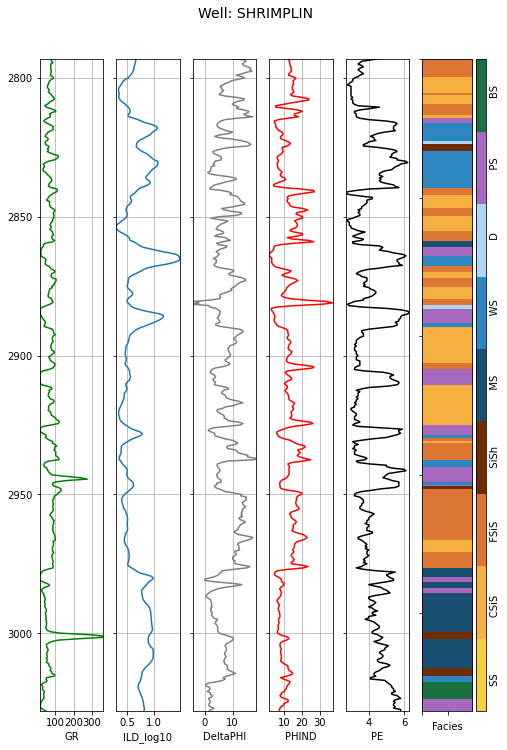

In [222]:
## Plots
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS']
make_facies_log_plot(logs=train_data[train_data['Well Name'] == 'SHRIMPLIN'], facies_colors=facies_colors)

In [102]:
## Count the number of each facies, sort them by facies number
facies_count = train_y.value_counts().sort_index()
facies_count.index = facies_labels
facies_count

SS      268
CSiS    940
FSiS    780
SiSh    271
MS      296
WS      582
D       141
PS      686
BS      185
Name: Facies, dtype: int64

<AxesSubplot:title={'center':'Distribution of Training labels'}>

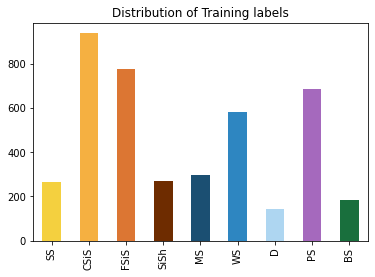

In [223]:
facies_count.plot(kind='bar', color=facies_colors, title='Distribution of Training labels')

In [224]:
## load test data and split input and output
test_data = pd.read_csv('data/test.csv')
test_x = test_data[input_features]
test_y = test_data['Facies']

In [225]:
## Get well names and depth
train_wells = train_data['Well Name'].values
train_depth = train_data['Depth'].values
train_x = train_x.values
train_y = train_y.values

test_wells = test_data['Well Name'].values
test_depth = test_data['Depth'].values
test_x = test_x.values
test_y = test_y.values
train_x.shape

(4149, 7)

# TRAINING XGBOOST CLASSIFIER

In [226]:
pip install xgboost hyperopt lightgbm

Note: you may need to restart the kernel to use updated packages.


In [227]:
## Import libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn import preprocessing
from functools import partial
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from hyperopt.pyll.base import scope

## Feature Augmentation

In [228]:
## Augment useful features
def augment_features_window(X, N_neig):
    # Parameters
    N_row = X.shape[0]
    N_feat = X.shape[1]

    # Zero padding
    X = np.vstack((np.zeros((N_neig, N_feat)), X, (np.zeros((N_neig, N_feat)))))

    # Loop over windows
    X_aug = np.zeros((N_row, N_feat * (2 * N_neig + 1)))

    for r in np.arange(N_row) + N_neig:
        this_row = []
        for c in np.arange(-N_neig, N_neig + 1):
            this_row = np.hstack((this_row, X[r + c]))
        X_aug[r - N_neig] = this_row

    return X_aug

In [229]:
# Feature gradient computation function
def augment_features_gradient(X, depth):
    # Compute features gradient
    d_diff = np.diff(depth).reshape((-1, 1))
    d_diff[d_diff == 0] = 0.001
    X_diff = np.diff(X, axis=0)
    X_grad = X_diff / d_diff

    # Compensate for last missing value
    X_grad = np.concatenate((X_grad, np.zeros((1, X_grad.shape[1]))))

    return X_grad

In [230]:
# Feature augmentation function
def augment_features(X, well, depth, N_neig=1):
    # Augment features
    X_aug = np.zeros((X.shape[0], X.shape[1] * (N_neig * 2 + 2)))
    for w in np.unique(well):
        w_idx = np.where(well == w)[0]
        X_aug_win = augment_features_window(X[w_idx, :], N_neig)
        X_aug_grad = augment_features_gradient(X[w_idx, :], depth[w_idx])
        X_aug[w_idx, :] = np.concatenate((X_aug_win, X_aug_grad), axis=1)

    # Find padded rows
    padded_rows = np.unique(np.where(X_aug[:, 0:7] == np.zeros((1, 7)))[0])

    return X_aug, padded_rows

In [231]:
# Data augmentation
def data_augmentation(X, well, depth, y=None, train=True):
    X, padded_rows = augment_features(X, well, depth)

    if train:
        X = np.delete(X, padded_rows, axis=0)
        if y is not None:
            y = np.delete(y, padded_rows, axis=0)

    return X, y

In [232]:
# Feature augmentation by polynomial combinations
def augment_features_polynomial(X, N_feat=5, degree=2):
    
    X_poly = X
    
    # Generate ILD from ILD_log10
    X_ild = np.power(10, X[:, 1]).reshape((-1, 1))
    X_poly = np.concatenate((X_poly, X_ild), axis=1)

    # Polynomial combinations
    for i in range(N_feat):
        for j in range(i, N_feat):
            X_feat = (X[:, i] * X[:, j]).reshape((-1, 1))
            X_poly = np.concatenate((X_poly, X_feat), axis=1)

    return X_poly

In [233]:
train_x_aug, train_y_aug = data_augmentation(train_x, train_wells, train_depth, train_y)
test_x_aug, test_y_aug = data_augmentation(test_x, test_wells, test_depth, test_y, train=False)
train_x_aug = augment_features_polynomial(train_x_aug)
test_x_aug = augment_features_polynomial(test_x_aug)
test_x_aug, test_y_aug

(array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [ 66.276   ,   0.63    ,   3.3     , ..., 113.4225  ,  38.24415 ,
          12.895281],
        [ 77.252   ,   0.585   ,   6.5     , ..., 142.8025  ,  39.92495 ,
          11.162281],
        ...,
        [ 88.855   ,   0.539   ,   5.56    , ..., 280.5625  ,  52.2265  ,
           9.721924],
        [ 90.49    ,   0.53    ,   6.36    , ..., 281.5684  ,  53.15904 ,
          10.036224],
        [ 90.975   ,   0.522   ,   7.035   , ..., 288.830025,  53.60223 ,
           9.947716]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        6, 6, 8, 8, 8, 8, 6, 6, 6, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6,
        5, 6, 6, 5, 8, 9, 9, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6,
        6, 6, 6, 8, 8, 5, 5, 5, 7, 5, 3

In [234]:
train_x_aug.shape, train_y_aug.shape, test_x_aug.shape, test_y_aug.shape

((4131, 44), (4131,), (821, 44), (821,))

In [235]:
# Train classifier  
clf = LGBMClassifier(learning_rate=0.08,
                     max_depth=3,
                     min_child_weight=10,
                     n_estimators=150,
                     seed=1,
                     colsample_bytree=0.9)

clf.fit(train_x_aug, train_y_aug)

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.08, max_depth=3,
               min_child_weight=10, n_estimators=150, seed=1)

In [236]:
pred_y = clf.predict(test_x_aug)
score = classification_report(test_y_aug, pred_y, output_dict=True)['weighted avg']['f1-score']
score

0.5948945438922242

In [237]:
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0)).fit(train_x_aug)
train_x_aug_norm = scaler.transform(train_x_aug)
test_x_aug_norm = scaler.transform(test_x_aug)

In [238]:
# Train classifier  
clf = LGBMClassifier(learning_rate=0.08,
                     max_depth=3,
                     min_child_weight=10,
                     n_estimators=150,
                     seed=1,
                     colsample_bytree=0.9)

clf.fit(train_x_aug_norm, train_y_aug)

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.08, max_depth=3,
               min_child_weight=10, n_estimators=150, seed=1)

In [239]:
pred_y = clf.predict(test_x_aug_norm)
score = classification_report(test_y_aug, pred_y, output_dict=True)['weighted avg']['f1-score']
score

0.5945339988256491

## Hyperparameter optimization

In [240]:
hyperparam_space = {'max_depth': scope.int(hp.choice('max_depth', range(5, 13, 1))),
                    'learning_rate': hp.loguniform('learning_rate', np.log(1e-3), np.log(1e-1)),
                    'num_leaves': scope.int(hp.quniform('num_leaves', 30, 150, 1)),
                    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 100)),                    
                    'min_child_weight': scope.int(hp.quniform('min_child_weight', 1, 10, 1)),
                    'subsample': hp.uniform('subsample', 0.3, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1)}

In [241]:
def lgb_f1_score(y_true, y_pred):
    preds = y_pred.reshape(len(np.unique(y_true)), -1)
    preds = preds.argmax(axis = 0)

        ## name: string, eval_result: float, is_higher_better: bool
    return 'f1', f1_score(y_true, preds,average='macro'), True

In [242]:
def objective(space, train_x, train_y, num_cv):
    skf = StratifiedKFold(n_splits=num_cv, shuffle=True)
    
    cv_score_list = []
    for train_index, test_index in skf.split(train_x, train_y):
        classifier = LGBMClassifier(n_estimators=space['n_estimators'],
                                    max_depth=space['max_depth'],
                                    learning_rate=space['learning_rate'],                          
                                    num_leaves=space['num_leaves'],
                                    min_child_weight=space['min_child_weight'],
                                    subsample=space['subsample'],
                                    colsample_bytree=space['colsample_bytree'],
                                    objective='multiclass',
                                    num_class=len(facies_labels))
    
        fit_params = {'eval_metric': 'multi_logloss', 'early_stopping_rounds': 30, 'verbose': False}

        classifier.fit(train_x[train_index], train_y[train_index])
        pred_y = classifier.predict(train_x[test_index])
        real_y = train_y[test_index]
        
        score = classification_report(y_true=real_y, y_pred=pred_y, output_dict=True)
        f1 = score['weighted avg']['f1-score']
        cv_score_list.append(f1)
        
    total_f1 = np.array(cv_score_list).mean()
    
    print('CrossValF1: ', total_f1)
    
    return {'loss': 1-total_f1, 'status': STATUS_OK}

In [243]:
NUM_CV = 5
MAX_EVALS = 100

func = partial(objective, train_x=train_x_aug_norm, train_y=train_y_aug, num_cv=NUM_CV)
trials = Trials()

In [244]:
best = fmin(fn=func, space=hyperparam_space, algo=tpe.suggest, trials=trials, max_evals=MAX_EVALS)

CrossValF1:                                            
0.7528877171804063                                     
CrossValF1:                                                                         
0.6970914787504926                                                                  
CrossValF1:                                                                         
0.7539220119705174                                                                  
CrossValF1:                                                                         
0.7644716802388567                                                                  
CrossValF1:                                                                         
0.7582940943059834                                                                 
CrossValF1:                                                                        
0.7672389317997205                                                                 
CrossValF1:                              

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classifi

CrossValF1:                                                                          
0.5999561465143375                                                                   
 18%|█▊        | 18/100 [14:58<58:53, 43.09s/trial, best loss: 0.22751802613431127]  

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



CrossValF1:                                                                        
0.7007940323821644                                                                 
[LightGBM] [Warning]                                                                 
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning]                                                                 
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning]                                                                 
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning]                                                                 
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning]                                

KeyboardInterrupt: 

In [194]:
best

{'colsample_bytree': 0.5283028047934141,
 'learning_rate': 0.03998337566618173,
 'max_depth': 5,
 'min_child_weight': 1.0,
 'n_estimators': 400.0,
 'num_leaves': 125.0,
 'subsample': 0.9760773072535893}

In [202]:
## Get best parameters
classifier = LGBMClassifier(n_estimators=int(best['n_estimators']),
                            max_depth=int(best['max_depth']),
                            learning_rate=best['learning_rate'],
                            num_leaves=int(best['num_leaves']),
                            min_child_weight=best['min_child_weight'],
                            subsample=best['subsample'],
                            colsample_bytree=best['colsample_bytree'],
                            objective='multiclass',
                            seed=1,
                            num_class=len(facies_labels))

fit_params = {'eval_metric': 'multi_logloss', 'early_stopping_rounds': 50, 'verbose': False}
classifier.fit(train_x_aug_norm, train_y_aug, eval_set=[(test_x_aug_norm, test_y_aug)], **fit_params)

LGBMClassifier(colsample_bytree=0.5283028047934141,
               learning_rate=0.03998337566618173, max_depth=5,
               min_child_weight=1.0, n_estimators=400, num_class=9,
               num_leaves=125, objective='multiclass', seed=1,
               subsample=0.9760773072535893)

In [203]:
pred_train_y = classifier.predict(train_x_aug_norm)
final_train_score = classification_report(train_y_aug, pred_train_y, output_dict=True)['weighted avg']['f1-score']
final_train_score

0.8999441437015314

In [204]:
pred_test_y = classifier.predict(test_x_aug_norm)
final_score = classification_report(test_y_aug, pred_test_y, output_dict=True)['weighted avg']['f1-score']
final_score

0.5903110675113368

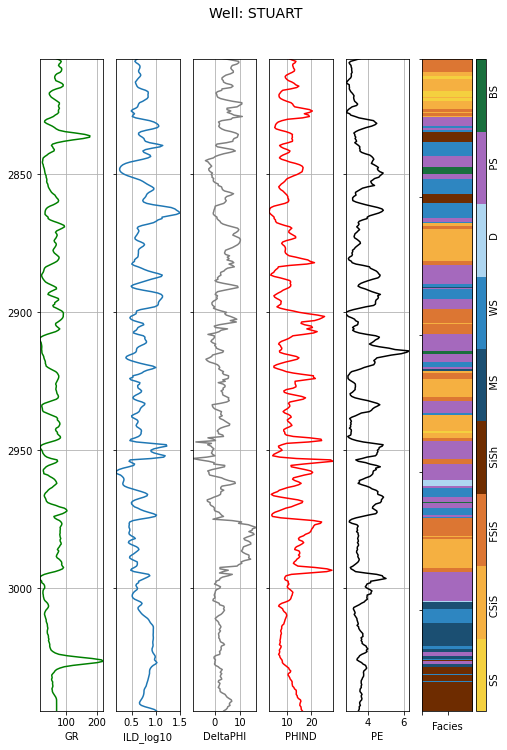

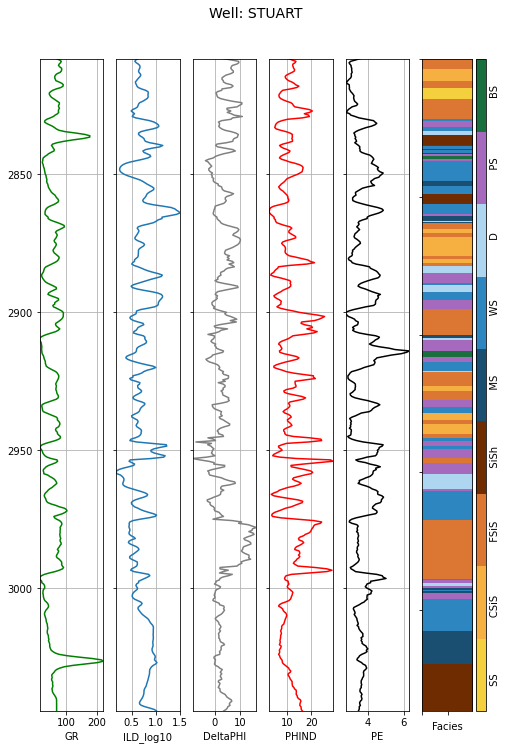

In [205]:
## Plot
test_pred_data = test_data.copy()
test_pred_data['Facies'] = pred_test_y_
make_facies_log_plot(logs=test_pred_data[test_pred_data['Well Name']=='STUART'], facies_colors=facies_colors) # For predicted data
make_facies_log_plot(logs=test_data[test_data['Well Name']=='STUART'], facies_colors=facies_colors)

In [206]:
## Save
test_pred_data.to_csv('test_predicted.csv', index=False)